# Bangalore House Price Prediction

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [ ]:
#Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px


import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Data Load: Load Bangalore house prices data into a dataframe

In [ ]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

In [ ]:
df1.shape

In [ ]:
df1.columns

In [ ]:
df1.describe()

In [ ]:
df1.describe().T

In [ ]:
dict = {}
for x in list(df.columns):
    dict[x] = df[x].value_counts().shape[0]

pd.DataFrame(dict, index=["Unique Counts"]).transpose()

In [ ]:
df1['area_type'].unique()

In [ ]:
df1['area_type'].value_counts()

##### Drop features that are not required to build our model

In [ ]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

### Data Cleaning: Handle NA values

In [ ]:
df2.isnull().sum()

In [ ]:
df2.shape

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

In [ ]:
df3.shape

In [ ]:
df3.isna().sum()

In [ ]:
df["size"].replace({"4 Bedroom": "4 BHK", 
                    "6 Bedroom": "6 BHK",
                   "3 Bedroom" : "3 BHK",
                   "1 Bedroom" : "1 BHK",
                   "1 RK" : "1 BHK",
                   '8 Bedroom' : '8 BHK',
                   '2 Bedroom': '2 BHK',
                   '7 Bedroom': '7 BHK',
                   '5 Bedroom' : '5 BHK',
                   '9 Bedroom': '9 BHK',
                   '10 Bedroom': '10 BHK',
                   '11 Bedroom': '11 BHK',
                   '43 Bedroom': '43 BHK',
                   '12 Bedroom': '12 BHK',
                   '18 Bedroom': '18 BHK'}, inplace=True)

##            𝐸𝑥𝑝𝑙𝑜𝑟𝑎𝑡𝑜𝑟𝑦 𝐷𝑎𝑡𝑎 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠

In [ ]:
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
#categorical columns
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols  

In [ ]:
#numerical columns
num_cols = df.select_dtypes(include = 'float64').columns
num_cols  

### 1. 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠

In [ ]:
sns.countplot(df.area_type,
              palette = 'Set3',
              edgecolor=sns.color_palette("Set3", 4))

In [ ]:
sns.countplot(df['size'],
              palette = 'Set3')

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(6,16))

sns.set_theme(style="darkgrid")
axes[0].set_title("Bath distribution")
axes[1].set_title("Balcony distribution")
axes[2].set_title("Price distribution")

sns.boxenplot(y=df.bath,
            palette='Greens', 
            color='red',
           linewidth=3,
           ax=axes[0]);

sns.countplot(df.balcony,
              palette = 'prism',
             ax = axes[1])

sns.boxenplot(y=df.price,
            palette='viridis',
           linewidth=1,
              ax=axes[2])

plt.tight_layout(pad=2);

### 2. 𝐵𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠

In [ ]:
num_cols

In [ ]:
df.shape

In [ ]:
px.histogram(df.sample(10000), 
           title='bath vs price',
           x='bath', 
           y='price')

In [ ]:
px.histogram(df.sample(10000), 
           title='balcony vs price',
           x='balcony', 
           y='price')

In [ ]:
px.histogram(df.sample(10000), 
           title='bath vs balcony',
           x='bath', 
           y='balcony')

### 3. 𝑀𝑢𝑙𝑡𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 

In [ ]:
num_cols

In [ ]:
cat_cols

In [ ]:
plt.figure(figsize = (8,6))
plt.title('Correlation between variables')
sns.heatmap(df.corr(), fmt='.1f', annot=True, cmap= "bone_r");

## Feature Engineering

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [ ]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

### Explore total_sqft feature

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple 

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [ ]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(5)

#### For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [ ]:
df4.loc[30]

In [ ]:
(2100+2850)/2

## Feature Engineering 

#### Add new feature called price per square feet (price_per_sqft)

In [ ]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

In [ ]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

In [ ]:
df5.to_csv("bhp.csv",index=False)

### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations 

In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

In [ ]:
location_stats.values.sum()

In [ ]:
len(location_stats[location_stats>10])

In [ ]:
len(location_stats)

In [ ]:
len(location_stats[location_stats<=10])

## Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. 
This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, 
it will help us with having fewer dummy columns

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

In [ ]:
len(df5.location.unique())

In [ ]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

In [ ]:
df5.head(10)

## Outlier Removal Using Business Logic

#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft 

In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()

### Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely 

In [ ]:
df5.shape

In [ ]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

## Outlier Removal Using Standard Deviation and Mean 

In [ ]:
df6.price_per_sqft.describe()

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [ ]:
plot_scatter_chart(df7,"Hebbal")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

#### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

In [ ]:
plot_scatter_chart(df8,"Rajaji Nagar")

In [ ]:
plot_scatter_chart(df8,"Hebbal")

### Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

### Before and after outlier removal: Rajaji Nagar

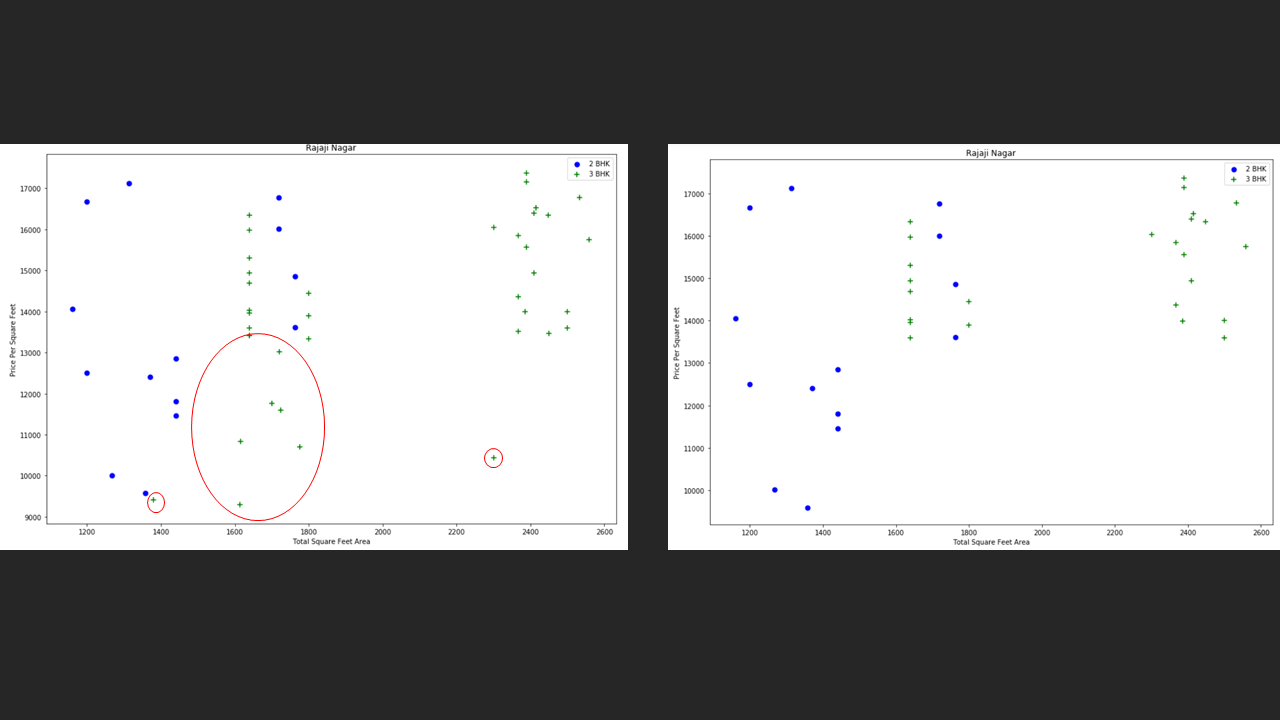

### Before and after outlier removal: Hebbal 

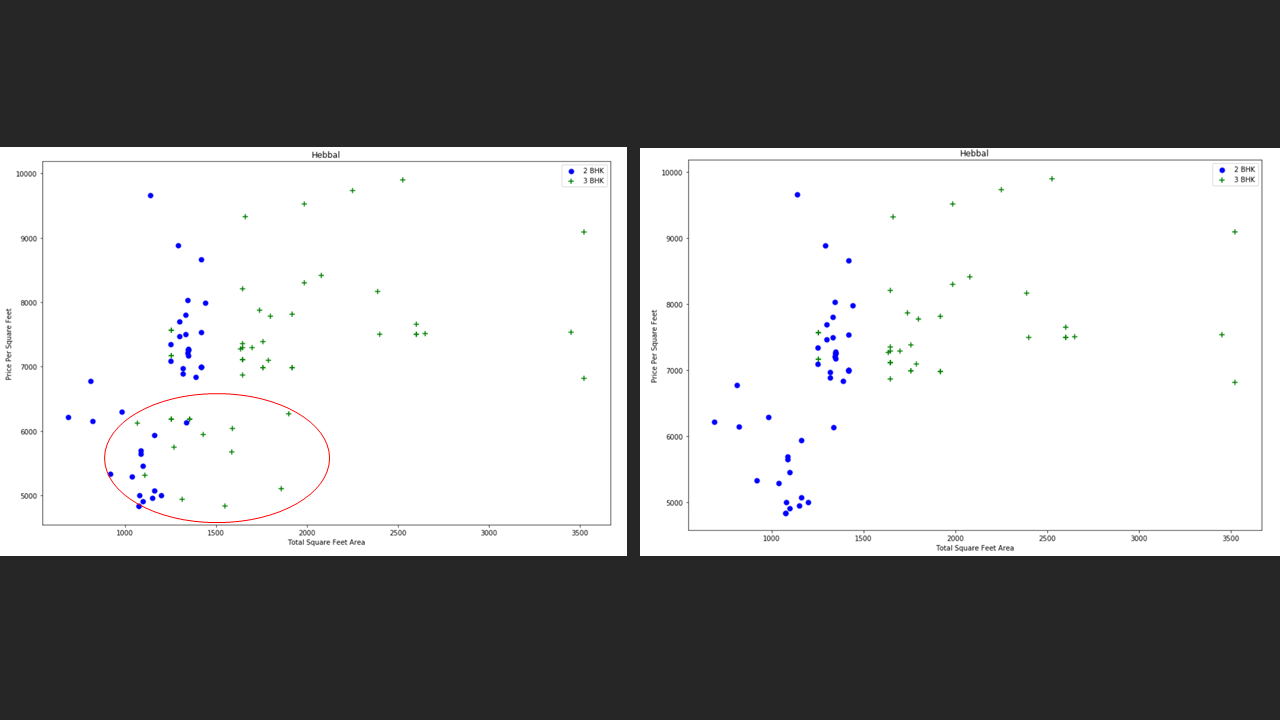

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Outlier Removal Using Bathrooms Feature

In [ ]:
df8.bath.unique()

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>10]

#### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [ ]:
df8[df8.bath>df8.bhk+2]

#### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

In [ ]:
df9.head(2)

In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

## Use One Hot Encoding For Location

In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

# Model Building

In [ ]:
df12.shape

In [ ]:
X = df12.drop(['price'],axis='columns')
X.head(3)

In [ ]:
X.shape

In [ ]:
y = df12.price
y.head(3)

In [ ]:
len(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

#### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Find best model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Test the model for few properties

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

In [ ]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

In [ ]:
predict_price('Indira Nagar',1000, 2, 2)

In [ ]:
predict_price('Indira Nagar',1000, 3, 3)

### Export the tested model to a pickle file

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))